<a href="https://colab.research.google.com/github/Eaglesight02/Pheonix_Squadron/blob/wing_0/Copy_2_of_Diabetic_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Getting the data and uploading it into our google drive.


In [1]:
# # # Mounting the google drive(Of Pheonix Squadron)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from google.colab import files
uploaded = files.upload()

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/retinal-disease-classification

100% 7.43G/7.43G [06:02<00:00, 21.5MB/s]
100% 7.43G/7.43G [06:02<00:00, 22.0MB/s]


In [4]:
import zipfile
with zipfile.ZipFile('/content/retinal-disease-classification.zip','r') as zip_ref:
  zip_ref.extractall('Diabetic Retinopathy')

In [5]:
import os
os.remove('/content/retinal-disease-classification.zip')

### 2. Setting the Paths.

In [6]:
import os

In [7]:
Data_path = '/content/Diabetic Retinopathy'

In [8]:
Training_set = os.path.join(Data_path,'Training_Set','Training_Set')
Testing_set = os.path.join(Data_path,'Test_Set','Test_Set')
Validation_set = os.path.join(Data_path,'Evaluation_Set','Evaluation_Set')

In [9]:
Training_set

'/content/Diabetic Retinopathy/Training_Set/Training_Set'

In [10]:
Testing_set

'/content/Diabetic Retinopathy/Test_Set/Test_Set'

In [11]:
Validation_set

'/content/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set'

In [12]:
Training_images = os.path.join(Training_set,'Training/')
Testing_images = os.path.join(Testing_set,'Test/')
Validation_images = os.path.join(Validation_set,'Validation/')

In [13]:
Training_images

'/content/Diabetic Retinopathy/Training_Set/Training_Set/Training/'

In [14]:
Testing_images

'/content/Diabetic Retinopathy/Test_Set/Test_Set/Test/'

In [15]:
Validation_images

'/content/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set/Validation/'

In [16]:
Training_labels = os.path.join(Training_set,'RFMiD_Training_Labels.csv')
Testing_labels = os.path.join(Testing_set,'RFMiD_Testing_Labels.csv')
Validation_labels = os.path.join(Validation_set,'RFMiD_Validation_Labels.csv')

In [17]:
Training_labels

'/content/Diabetic Retinopathy/Training_Set/Training_Set/RFMiD_Training_Labels.csv'

In [18]:
Testing_labels

'/content/Diabetic Retinopathy/Test_Set/Test_Set/RFMiD_Testing_Labels.csv'

In [19]:
Validation_labels

'/content/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv'

### 3. Importing the necessary modules and reading the labels: 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
import random
from keras.preprocessing.image import ImageDataGenerator

In [21]:
Train_df = pd.read_csv(Training_labels)
Test_df = pd.read_csv(Testing_labels)
Val_df = pd.read_csv(Validation_labels)

### 4. Basic EDA

In [22]:
Train_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Test_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Val_df.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Train_df.drop(columns=Train_df.columns[3:],axis=1,inplace=True)
Test_df.drop(columns=Test_df.columns[3:],axis=1,inplace=True)
Val_df.drop(columns=Val_df.columns[3:],axis=1,inplace=True)

In [26]:
Train_df.drop(columns=['Disease_Risk'],axis=1,inplace=True)
Test_df.drop(columns=['Disease_Risk'],axis=1,inplace=True)
Val_df.drop(columns=['Disease_Risk'],axis=1,inplace=True)

In [27]:
Train_df.head()

,ID,DR
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [28]:
Test_df.head()

,ID,DR
0,1,1
1,2,1
2,3,1
3,4,0
4,5,0


In [29]:
Val_df.head()

,ID,DR
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [30]:
Train_df.describe()

,ID,DR
count,1920.000000,1920.000000
mean,960.500000,0.195833
std,554.400577,0.396944
min,1.000000,0.000000
25%,480.750000,0.000000
50%,960.500000,0.000000
75%,1440.250000,0.000000
max,1920.000000,1.000000


In [31]:
Val_df.describe()

,ID,DR
count,640.000000,640.000000
mean,320.500000,0.206250
std,184.896367,0.404929
min,1.000000,0.000000
25%,160.750000,0.000000
50%,320.500000,0.000000
75%,480.250000,0.000000
max,640.000000,1.000000


In [32]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      1920 non-null   int64
 1   DR      1920 non-null   int64
dtypes: int64(2)
memory usage: 30.1 KB


In [33]:
Val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      640 non-null    int64
 1   DR      640 non-null    int64
dtypes: int64(2)
memory usage: 10.1 KB


In [34]:
Train_df.isna().sum()

ID    0
DR    0
dtype: int64

In [35]:
Val_df.isna().sum()

ID    0
DR    0
dtype: int64

### 5. Getting the file paths for the images.

In [36]:
Train_df['filepath'] = Train_df['ID'].apply(lambda x: Training_images + str(x) + '.png')
Val_df['filepath'] = Val_df['ID'].apply(lambda x: Validation_images + str(x) + '.png')
Test_df['filepath'] = Test_df['ID'].apply(lambda x: Testing_images + str(x) + '.png')

In [37]:
Train_df['filepath'][0]

'/content/Diabetic Retinopathy/Training_Set/Training_Set/Training/1.png'

In [38]:
Val_df['filepath'][0]

'/content/Diabetic Retinopathy/Evaluation_Set/Evaluation_Set/Validation/1.png'

In [39]:
Test_df['filepath'][0]

'/content/Diabetic Retinopathy/Test_Set/Test_Set/Test/1.png'

### 6. Sample Images

In [40]:
Train_df['DR'].value_counts()

0    1544
1     376
Name: DR, dtype: int64

In [41]:
Val_df['DR'].value_counts()

0    508
1    132
Name: DR, dtype: int64

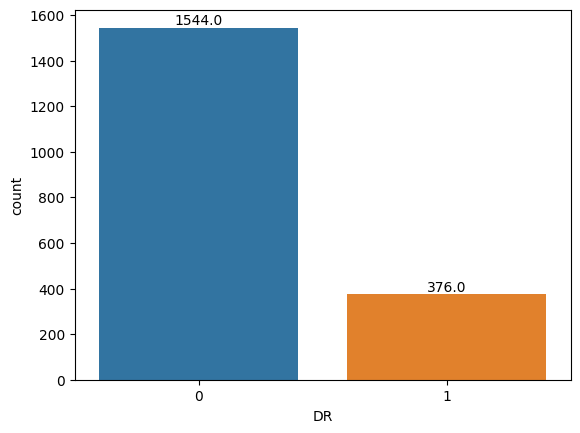

In [42]:
ax = sns.countplot(x='DR',data=Train_df)
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom')

plt.show()

Display Random Images


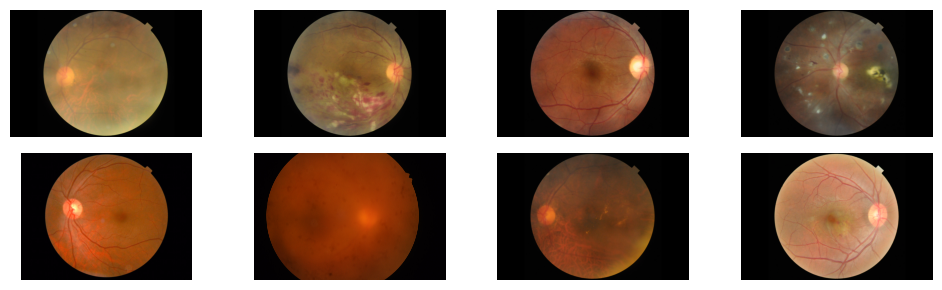

In [43]:
# Getting random eye images from the Train Image paths
random_eye_images = [np.random.choice(Train_df['filepath']) for i in range(8)]

print("Display Random Images")

# Setting the figure size to 20px horizontally and 10px vertically.
plt.figure(figsize=(10, 3))

# Plotting 9 random images of the eyes.
for i in range(8):
  plt.subplot(2, 4, i+1)                # plt.subplot(nrows, ncols, index) nrows: no.of rows, ncols: no.of cols, index: selecting the subplot.
  img = plt.imread(random_eye_images[i])  # Reading the image using plt.imread function.
  plt.imshow(img)                         # Showing the images by plotting them.
  plt.axis('off')                         # Not taking the axis.
  
plt.tight_layout()                        # Used to adjust padding between the subplots.

### 7. ImageDataGenerator

In [ ]:
"""datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)"""

In [44]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1920 non-null   int64 
 1   DR        1920 non-null   int64 
 2   filepath  1920 non-null   object
dtypes: int64(2), object(1)
memory usage: 45.1+ KB


In [ ]:
# import random
# temp =[]
# for i in range(len(diseased_Eyes)):
#   temp.append(healthy_Eyes.iloc[random.choice(range(len(diseased_Eyes))), :])
# demo = pd.DataFrame(temp, columns = healthy_Eyes.columns)

In [45]:
train_Data = pd.concat([Train_df, Val_df])

In [46]:
train_Data['DR'].value_counts()

0    2052
1     508
Name: DR, dtype: int64

In [47]:
from sklearn.utils import shuffle
def balance_Data(data, feature):
  class_01 = data[data[feature] == 1]
  class_00 = data[data[feature] == 0]
  return shuffle(pd.concat([class_01, class_00.sample(n = round(1.5 * len(class_01)))]))

In [48]:
bal_Train_Data = balance_Data(train_Data, 'DR')

In [49]:
bal_Train_Data['DR'].value_counts()

0    762
1    508
Name: DR, dtype: int64

In [57]:
# Load and preprocess the grayscale images
from PIL import Image

def img2Gray(image_Paths):
  gray_Images = []

  for image_Path in image_Paths:
      gray_Image = Image.open(image_Path).resize((224, 224))
      gray_Array = np.array(gray_Image)
      norm_Array = gray_Array / 255.0
      reshaped_Array = norm_Array.reshape(224, 224, 3)
      gray_Images.append(reshaped_Array)
      
  gray_Images = np.array(gray_Images)
  return gray_Images

In [58]:
train_Features = img2Gray(bal_Train_Data['filepath'])

In [53]:
train_Targets = bal_Train_Data['DR']

In [54]:
from keras.callbacks import ModelCheckpoint
filepath = "-{epoch:02d}-{recall:.02f}.h5"

In [55]:
checkpoints = ModelCheckpoint(
    filepath,
    monitor = 'recall',
    verbose = 1,
    save_best_only = True,
    save_feq = 10,
    mode = 'max')

In [59]:
inceptionv3 = keras.applications.inception_v3.InceptionV3(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

87910968/87910968 [==============================] - 6s 0us/step


In [60]:
inceptionv3.trainable = False

In [61]:
# Create the CNN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model = Sequential([
    inceptionv3,
    # Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 1)),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation = 'relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(128, (3, 3), activation = 'relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Train the model
history = model.fit(train_Features, train_Targets, epochs = 10, batch_size = 32, callbacks = [checkpoints])

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 2.8732 - recall: 0.7264
Epoch 1: recall improved from -inf to 0.72638, saving model to -01-0.73.h5
40/40 [==============================] - 19s 120ms/step - loss: 2.8732 - recall: 0.7264
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 0.6349 - recall: 0.1201
Epoch 2: recall did not improve from 0.72638
40/40 [==============================] - 3s 69ms/step - loss: 0.6349 - recall: 0.1201
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 0.5797 - recall: 0.0000e+00
Epoch 3: recall did not improve from 0.72638
40/40 [==============================] - 3s 69ms/step - loss: 0.5797 - recall: 0.0000e+00
Epoch 4/10
40/40 [==============================] - ETA: 0s - loss: 0.4884 - recall: 0.6713
Epoch 4: recall did not improve from 0.72638
40/40 [==============================] - 3s 71ms/step - loss: 0.4884 - recall: 0.6713
Epoch 5/10
40/40 [==============================] - ETA: 0s - loss: 

In [ ]:
# val_Array = img2Gray(Val_df['filepath'])

In [ ]:
# # Evaluate the model on the test set
# val_loss, val_acc = model.evaluate(val_Array, Val_df['DR'])
# print('Validation accuracy:', val_acc)

20/20 [==============================] - 1s 17ms/step - loss: 0.5496 - recall: 0.0833
Validation accuracy: 0.0833333358168602


In [62]:
test_Array = img2Gray(Test_df['filepath'])

In [63]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_Array, Test_df['DR'])
print('Test Recall:', test_acc)

20/20 [==============================] - 3s 72ms/step - loss: 0.3280 - recall: 0.6694
Test Recall: 0.6693548560142517


In [64]:
test_Predictions = model.predict(test_Array)

20/20 [==============================] - 2s 66ms/step


In [65]:
np.mean(test_Predictions)

0.16942003

In [66]:
test_Predictions_Bin = []
for prediction in test_Predictions:
  test_Predictions_Bin.append(0) if prediction <= np.mean(test_Predictions) else test_Predictions_Bin.append(1)

In [ ]:
# val_Predictions_Bin = pd.DataFrame(np.argmax(val_Predictions, axis = 1))

In [67]:
pd.DataFrame(test_Predictions_Bin).value_counts()

0    421
1    219
dtype: int64

In [ ]:
Test_df['DR'].value_counts()

0    516
1    124
Name: DR, dtype: int64

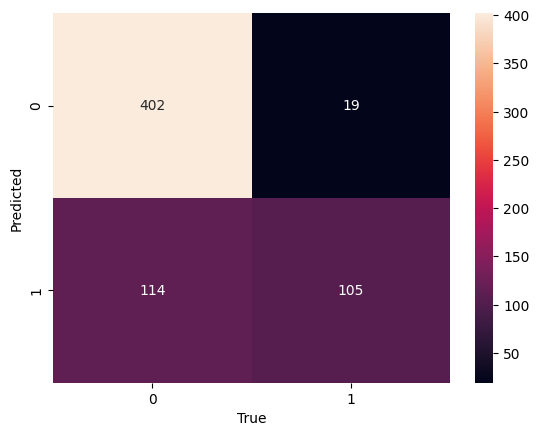

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
sns.heatmap(confusion_matrix(test_Predictions_Bin, Test_df['DR']), annot = True, fmt = 'd')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [69]:
from google.colab import files
uploaded = files.upload()

Saving PDR-OS-LRG.jpg to PDR-OS-LRG.jpg


In [70]:
image_Path = ""
filelist = os.listdir('/content/')
for file in filelist:
    if (file.endswith(".jpg")):
        image_Path += file

In [ ]:
# Test_df[Test_df['ID'] == 124]

In [ ]:
# image_Path = '/content/Diabetic Retinopathy/Test_Set/Test_Set/Test/271.png'

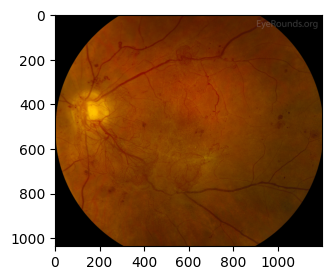

In [71]:
plt.figure(figsize = (10, 3))
plt.imshow(cv2.cvtColor(cv2.imread(image_Path), cv2.COLOR_BGR2RGB))

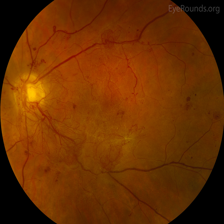

In [72]:
Image.open(image_Path).resize((224, 224))

In [73]:
path_List = [image_Path]

In [74]:
final_Prediction = model.predict(img2Gray(path_List))[0][0]*100

1/1 [==============================] - 4s 4s/step


In [75]:
print(f"Probability of Having Diabetic Retinopathy :{final_Prediction : .2f} %")

Probability of Having Diabetic Retinopathy : 0.61 %
